In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install imblearn

     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import load_breast_cancer
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
import seaborn as sns
%matplotlib inline

### 결측치 처리

- 결측치 확인

In [2]:
wine = pd.read_csv('./data/2-1_wine.csv', index_col=0)
print('**원본 데이터:\n', wine.isna().sum())

**원본 데이터:
 class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


In [3]:
# 결측치가 없으므로 두 개의 컬럼(Alcohol, Ash)에 임의로 결측치를 입력함.
# randint(최소, 최대, 개수)
wine_m = wine.copy()

for col in ['Alcohol', 'Ash'] : 
    for i in range(20) : 
        random_idx = np.random.randint(0, len(wine), 1)
        wine_m.loc[random_idx, col] = np.nan

print('\n**결측치 생성 데이터:\n', wine_m.isna().sum())


**결측치 생성 데이터:
 class                            0
Alcohol                         19
Malicacid                        0
Ash                             18
Alcalinity_of_ash                0
Magnesium                        0
Total_phenols                    0
Flavanoids                       0
Nonflavanoid_phenols             0
Proanthocyanins                  0
Color_intensity                  0
Hue                              0
0D280_0D315_of_diluted_wines     0
Proline                          0
dtype: int64


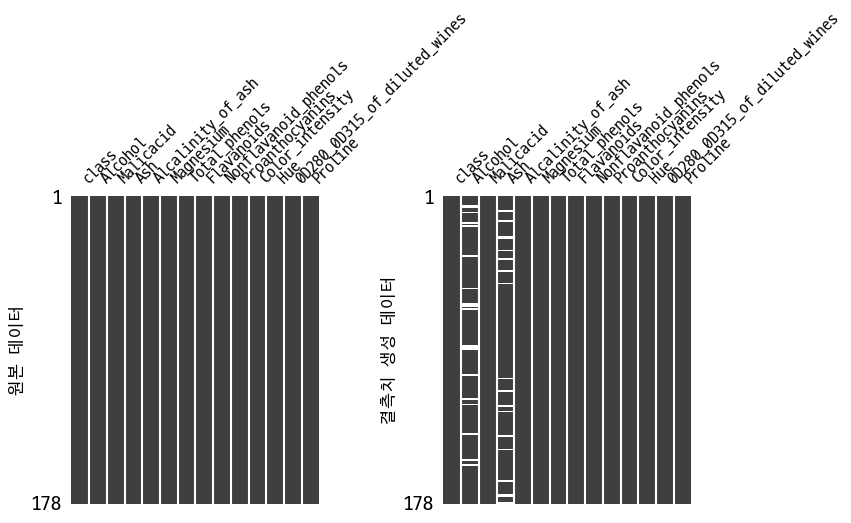

In [4]:
# plotting 환경 설정
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 2, figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

# 결측치 시각화(missingno)
msno.matrix(df=wine, figsize=(5,5), fontsize=12, ax=ax[0], sparkline=False)
ax[0].set_ylabel('원본 데이터')

msno.matrix(df=wine_m, figsize=(5,5), fontsize=12, ax=ax[1], sparkline=False)
ax[1].set_ylabel('결측치 생성 데이터')

plt.show()

- zero imputation과 constant imputaion

In [5]:
# 대치 전: wine_m
print(wine_m[['Alcohol','Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24  2.87
5      NaN  2.45
6      NaN  2.45
7    14.06  2.61
8    14.83   NaN
9      NaN  2.27


In [6]:
# 0으로 대치 후: wine_imp
wine_imp = wine_m.fillna(0)
print(wine_imp[['Alcohol','Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24  2.87
5     0.00  2.45
6     0.00  2.45
7    14.06  2.61
8    14.83  0.00
9     0.00  2.27


In [7]:
# 1000으로 대치 후: wine_imp
wine_imp = wine_m.fillna(1000)
print(wine_imp[['Alcohol','Ash']].head(10))

   Alcohol      Ash
0    14.23     2.43
1    13.20     2.14
2    13.16     2.67
3    14.37     2.50
4    13.24     2.87
5  1000.00     2.45
6  1000.00     2.45
7    14.06     2.61
8    14.83  1000.00
9  1000.00     2.27


- 대표값으로 채우는 방법

In [8]:
# 대표값으로 채우기 전: wine_m
print(wine_m[['Alcohol','Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24  2.87
5      NaN  2.45
6      NaN  2.45
7    14.06  2.61
8    14.83   NaN
9      NaN  2.27


In [9]:
# 대표값(mean)으로 채운 후: wine_imp1
# 전략 : 평균, 중위수, 최빈값
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
wine_imp1 = imputer.fit_transform(wine_m)
wine_imp1 = pd.DataFrame(wine_imp1, columns=wine_m.columns)

In [10]:
Al_mean = wine_m['Alcohol'].mean()
As_mean = wine_m['Ash'].mean()

In [11]:
print(f'Alcohol mean: {Al_mean:.5f}, Ash mean: {As_mean:.5f}')
print(wine_imp1[['Alcohol','Ash']].head(10))

Alcohol mean: 13.00981, Ash mean: 2.35519
     Alcohol       Ash
0  14.230000  2.430000
1  13.200000  2.140000
2  13.160000  2.670000
3  14.370000  2.500000
4  13.240000  2.870000
5  13.009811  2.450000
6  13.009811  2.450000
7  14.060000  2.610000
8  14.830000  2.355188
9  13.009811  2.270000


- 단순확률대치법
  1) Hot-deck : 연구와 비슷한 성향의 데이터
  2) Cold-deck : 외부 출처/이전의 비슷한 연구의 데이터

In [12]:
# Hot-deck 대치 후: wine_imp2
# Hot-deck 함수 정의
def HotDeck(data, reference) : 
    imp = data.copy()
    check = imp.isna().sum()
    for col, val in zip(check.index, check.values) : 
        if val == 0 : 
            continue
        else : 
            imp[col] = imp[col].apply(lambda x: 
                                      float(reference[col].sample(1).values) 
                                      if str(x) == 'nan' else x)
    return imp

In [13]:
# wine 데이터가 wine_m 데이터와 비슷한 성향을 가졌다고 가정하고 랜덤 샘플링함.
wine_imp2 = HotDeck(wine_m, wine)
wine_imp2.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- 다른 변수들로부터 모델링하여 결측값을 예측하는 방법

In [14]:
# KNNImputer 대치 후: wine_imp3
imputer = KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)
wine_imp3 = pd.DataFrame(wine_imp3, columns=wine_m.columns)
wine_imp3.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- 보간법

In [15]:
# 선형보간법 후: wine_imp4
wine_imp4 = wine_m.interpolate(method='linear')
wine_imp4.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- 실제값과 대치값의 비교

In [16]:
# 결측치가 있는 행의 인덱스를 찾는 함수 정의
def find_missing_idx(data, column) : 
    return np.argwhere(np.array(data[[column]].isna().sum(axis=1))>0).ravel()

In [17]:
# Alcohol feature 기준으로 대치값 비교
feature = 'Alcohol'
missing_idx = find_missing_idx(wine_m, feature)

report = pd.DataFrame({'실제값':wine[feature], 'mean대치':wine_imp1[feature],
                       'HotDeck':wine_imp2[feature], 'KNN대치':wine_imp3[feature],
                       '선형보간':wine_imp4[feature]})

missing_report = report.iloc[missing_idx,:]

score_report = pd.DataFrame(index=['MAE','MSE'])

for col in missing_report.columns : 
    mae = mean_absolute_error(missing_report['실제값'],missing_report[col])
    mse = mean_squared_error(missing_report['실제값'],missing_report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse
print(score_report)

     실제값    mean대치   HotDeck     KNN대치      선형보간
MAE  0.0  0.827378  0.972632  0.556842  0.413421
MSE  0.0  0.847073  1.280179  0.550248  0.262788


In [18]:
# Ash feature 기준으로 대치값 비교
feature = 'Ash'
missing_idx = find_missing_idx(wine_m, feature)

report = pd.DataFrame({'실제값':wine[feature], 'mean대치':wine_imp1[feature],
                       'HotDeck':wine_imp2[feature], 'KNN대치':wine_imp3[feature],
                       '선형보간':wine_imp4[feature]})

missing_report = report.iloc[missing_idx,:]

score_report = pd.DataFrame(index=['MAE','MSE'])

for col in missing_report.columns : 
    mae = mean_absolute_error(missing_report['실제값'], missing_report[col])
    mse = mean_squared_error(missing_report['실제값'], missing_report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse
print(score_report)

     실제값    mean대치   HotDeck     KNN대치      선형보간
MAE  0.0  0.222736  0.311111  0.249630  0.257222
MSE  0.0  0.098727  0.153778  0.118851  0.098223


### 이상치 처리

- 절단

In [19]:
# 이상치 절단 함수 정의
def del_outlier(df, columns, method='iqr') : 
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:, columns]
    if method == 'iqr' : 
        IQR = check_df.quantile(0.75) - check_df.quantile(0.25)
        top = check_df.quantile(0.75) + IQR * 1.5
        down = check_df.quantile(0.25) - IQR * 1.5
    elif method == 'esd' : 
        std = check_df.std()
        mean = check_df.mean()
        top = mean + std * 3
        down = mean - std * 3
    prep_dfs = []
    for col in columns : 
        out_id = check_df[(check_df[col] >= top[col])|
                          (check_df[col] <= down[col])][col].index
        check_df.drop(out_id, axis=0, inplace=True) # 이상치 제거하기
        prep_dfs.append(check_df[[col]])
    if len(prep_dfs) == 1 :
        prep_dfs = prep_dfs[0]
    return prep_dfs


In [20]:
# 이상치 처리 전후 시각화 함수 정의
def before_after_boxplot(df1,df2,figsize=(10,5),fontsize=13) : 
    fig, axes = plt.subplots(1,2)
    plt.rcParams['figure.figsize'] = figsize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.unicode_minus'] = False

    for data, ax, title in zip([df1,df2], axes, ['Before','After']) : 
        data.boxplot(ax=ax)
        ax.set_title(f'{title} ({len(data)})')
        margin = df1.std().values[0]/2
        ax.set_ylim(df1.min().values[0]-margin, df1.max().values[0]+margin)
    plt.show()

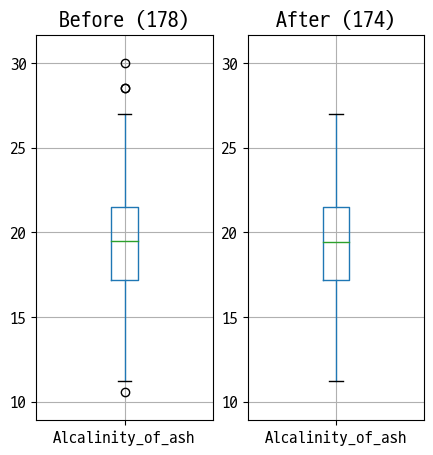

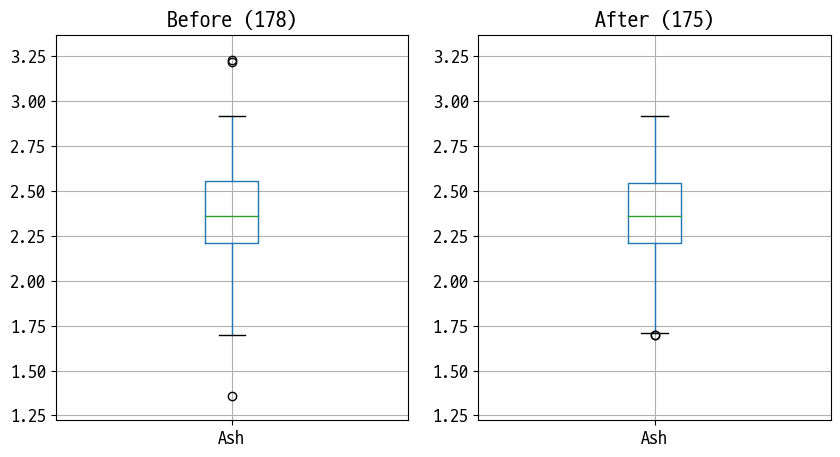

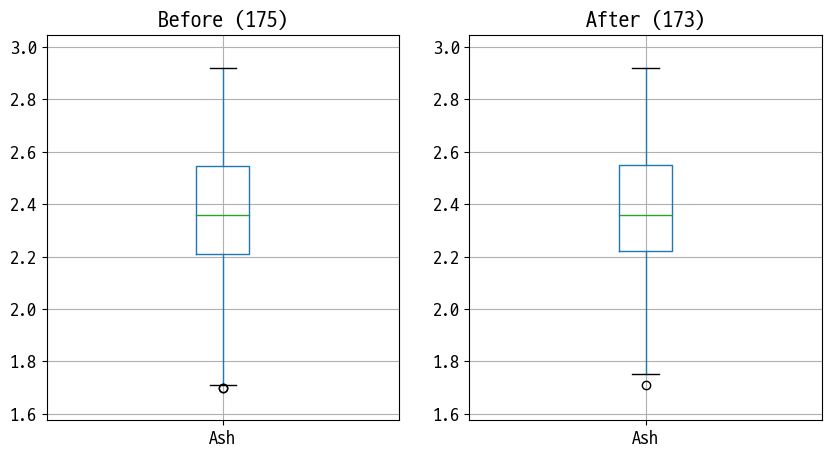

In [21]:
# prep_Alcal = prep_Ash = del_outlier(wine, ['Alcalinity_of_ash', 'Ash'], method='iqr')
prep_Alcal = del_outlier(wine, ['Alcalinity_of_ash'], method='iqr')
prep_Ash = del_outlier(wine, ['Ash'], method='iqr')

# Alcalinity_of_ash의 이상치 제거 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, prep_Alcal)

# Ash의 이상치 제거 전후
before = wine[['Ash']]
before_after_boxplot(before, prep_Ash)

# Ash의 두번째 이상치 제거 전후
before = prep_Ash
prep_Ash2 = del_outlier(prep_Ash, 'Ash')
before_after_boxplot(before, prep_Ash2)

- 조정 : 이상치를 경계값으로 보정

In [22]:
# 이상치 조정 함수 정의
def win_outlier(df, columns, method='iqr') : 
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:,columns]
    if method == 'iqr' : 
        IQR = check_df.quantile(0.75)-check_df.quantile(0.25)
        top = check_df.quantile(0.75)+IQR*1.5
        down = check_df.quantile(0.25)-IQR*1.5
    elif method == 'esd' : 
        std = check_df.std()
        mean = check_df.mean()
        top = mean + std*3
        down = mean - std*3
    for col in columns : 
        check_df[col] = check_df[col].clip(down[col], top[col])
    return check_df

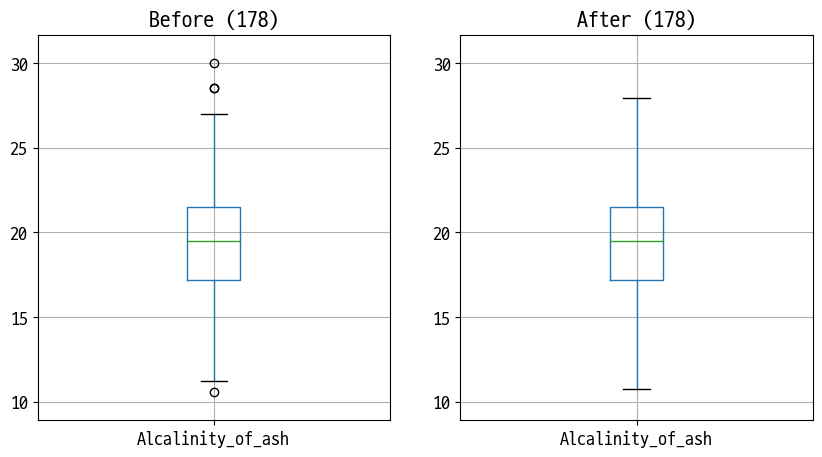

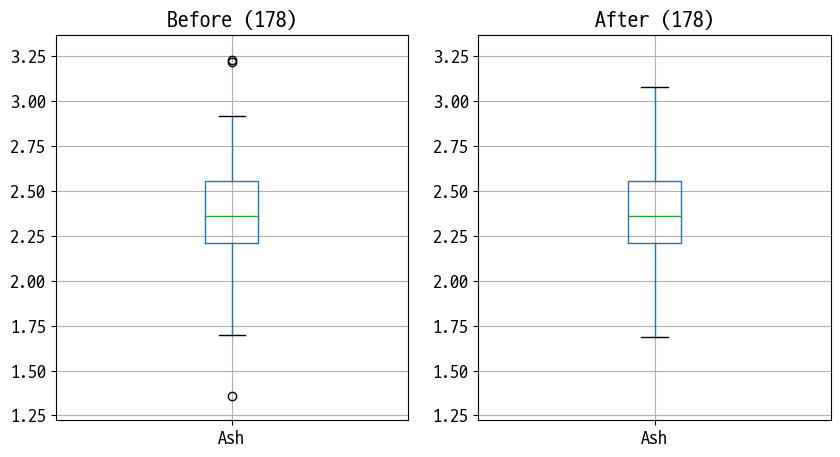

In [23]:
preps = win_outlier(wine, ['Alcalinity_of_ash','Ash'])

# Alcalinity_of_ahs의 이상치 조정 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, preps[['Alcalinity_of_ash']])

# Ash의 이상치 조정 전후
before = wine[['Ash']]
before_after_boxplot(before, preps[['Ash']])

- 클리핑(Clipping) : 이상치의 상한과 하한을 특정 숫자로 설장해서 이상치를 상한값과 하한값으로 보정하는 방법

In [24]:
# 이상치 클리핑 함수 정의
def clip_outlier(df, columns, downtop) : 
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:,columns]
    for col, dt in zip(columns, downtop) : 
        check_df[col] = check_df[col].clip(dt[0], dt[1])
    return check_df

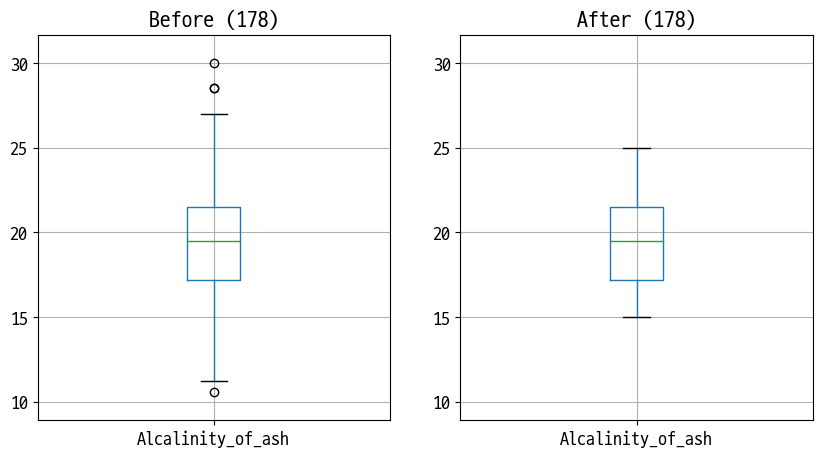

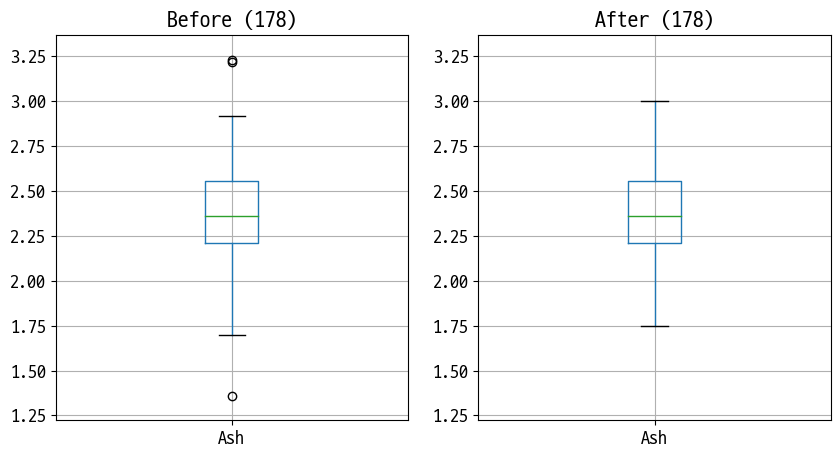

In [25]:
preps = clip_outlier(wine, ['Alcalinity_of_ash','Ash'], [(15,25),(1.75,3)])

# Alcalinity_of_ash의 클리핑 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, preps[['Alcalinity_of_ash']])

# Ash의 클리핑 전후
before = wine[['Ash']]
before_after_boxplot(before, preps[['Ash']])

### 클래스 불균형 처리

- 클래스 불균형 데이터 생성하기

In [26]:
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=['x%s' %i for i in range(data['data'].shape[1])]+['y'])

print('original data의 class 분포:', Counter(data['target']))
df1 = df[df['y']==0].sample(50)
df2 = df[df['y']==1].sample(250)
# 전체 특성 중 4개만 사용
imb_df = pd.concat([df1,df2]).reset_index(drop=True).iloc[:,-5:]
print('imbalanced data의 calss 분포:\n', Counter(imb_df['y']))

features = imb_df.drop('y', axis=1)
target = imb_df['y']

print(imb_df.head(3))

original data의 class 분포: Counter({1: 357, 0: 212})
imbalanced data의 calss 분포:
 Counter({1.0: 250, 0.0: 50})
      x26     x27     x28      x29    y
0  0.4634  0.2048  0.3679  0.09870  0.0
1  0.2432  0.1841  0.2311  0.09203  0.0
2  0.5018  0.2543  0.3109  0.09061  0.0


- 랜덤오버샘플링

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


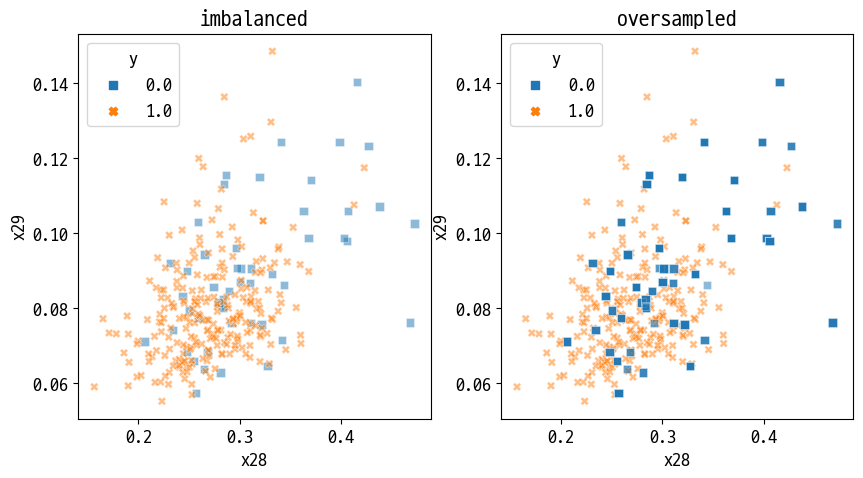

In [34]:
os = RandomOverSampler()
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df1 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5, style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df1, ax=ax[1], alpha=0.5, style='y', markers=['s','X'])

plt.show()

- SMOTE(Synthetic minority oversampling technique)
  - 임의의 소수 클래스 데이터로부터 인근 소수 클래스 사이에 새로운 데이터를 생성하는 방법

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


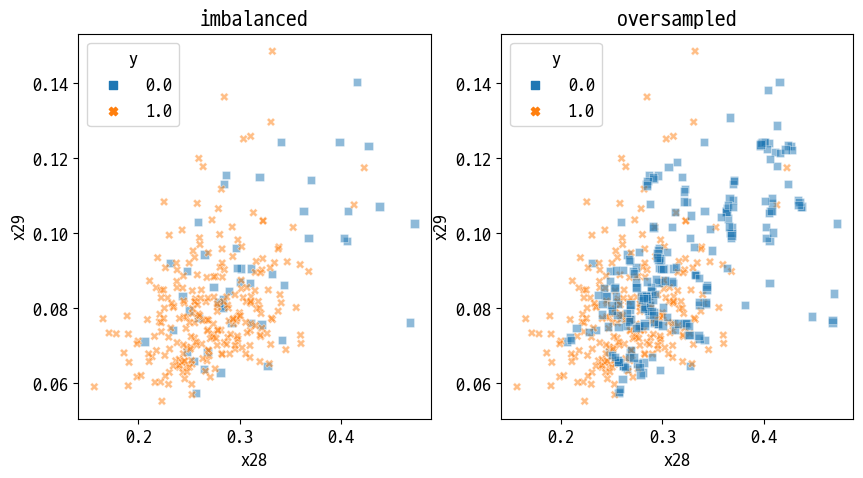

In [39]:
os = SMOTE(random_state=42, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df2 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5, style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df2, ax=ax[1], alpha=0.5, style='y', markers=['s','X'])

plt.show()

- Borderline SMOTE 
  - 다수 클래스와 소수 클래스를 구분하는 선을 그을 때 경계선에 있는 소수 클래스에 SMOTE기법 적용하는 방법

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


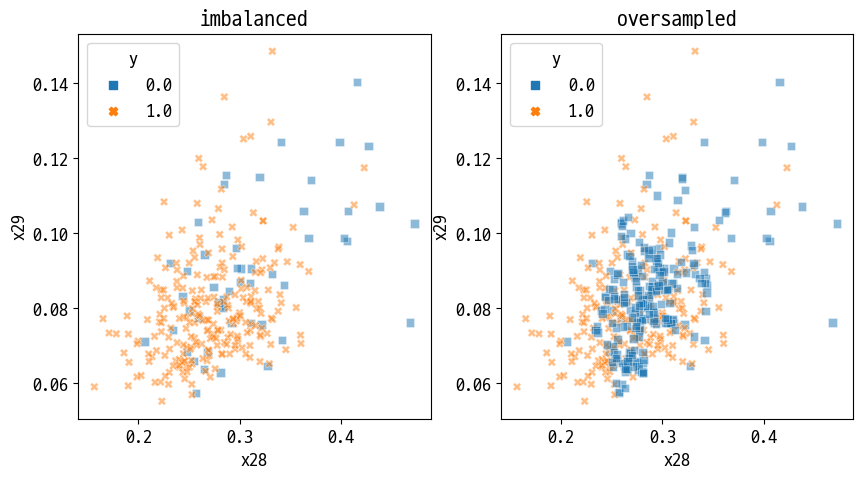

In [43]:
os = BorderlineSMOTE(random_state=0, k_neighbors=5)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df3 = pd.DataFrame(np.c_[bal_features,bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5, style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df3, ax=ax[1], alpha=0.5, style='y', markers=['s','X'])

plt.show()

- K-means SMOTE